In [22]:
#import the relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve


## Loading the dataset 

In [23]:
#Load the dataset
raw_data = pd.read_csv(r"ai4i2020 (1).csv")

X = raw_data.drop(columns=['UDI', 'Product ID', 'Type', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Machine failure']).values
y = raw_data['Machine failure'].values

#We split the data (20% test data)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#We scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Defining the models and parameters

In [24]:
#Logistic regression
log_reg = LogisticRegression(random_state=420)

#Random forest with bagging and feature randomness
rf = RandomForestClassifier(n_estimators=100,random_state=42)


# Doing cross validation of the data for each model (5 folds)
cv_scores_log_reg = cross_val_score(log_reg, X_train,y_train, cv=5)
print(f"Logistic regression cross validation {cv_scores_log_reg}")
print(f"Mean CV score: {cv_scores_log_reg.mean():.2f} (+/- {cv_scores_log_reg.std()*2:.2f})")

cv_scores_rf = cross_val_score(rf, X_train,y_train, cv=5)
print(f"Random forests cross validation {cv_scores_rf}")
print(f"Mean CV score: {cv_scores_rf.mean():.2f} (+/- {cv_scores_rf.std()*2:.2f})")

Logistic regression cross validation [0.974375 0.966875 0.966875 0.969375 0.968125]
Mean CV score: 0.97 (+/- 0.01)
Random forests cross validation [0.988125 0.979375 0.98375  0.981875 0.981875]
Mean CV score: 0.98 (+/- 0.01)


## Training the models on the data

In [25]:
#Fit the models
log_reg.fit(X_train,y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Logistic Regression Evaulation

Accuracy: 0.97
[[1930    9]
 [  45   16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.64      0.26      0.37        61

    accuracy                           0.97      2000
   macro avg       0.81      0.63      0.68      2000
weighted avg       0.97      0.97      0.97      2000



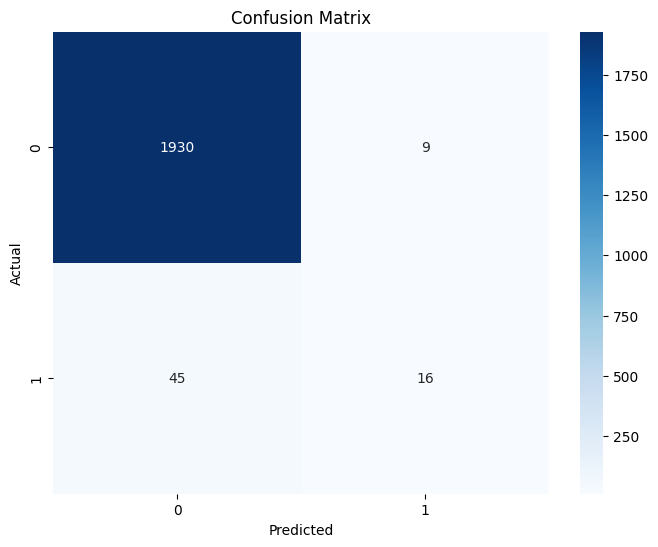

In [26]:
#Predicting and plotting using logistic regression model
y_pred_log_reg = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy: {accuracy:.2f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_log_reg)

print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Random Forests Evaluation

Accuracy: 0.98
[[1930    9]
 [  25   36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.80      0.59      0.68        61

    accuracy                           0.98      2000
   macro avg       0.89      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000



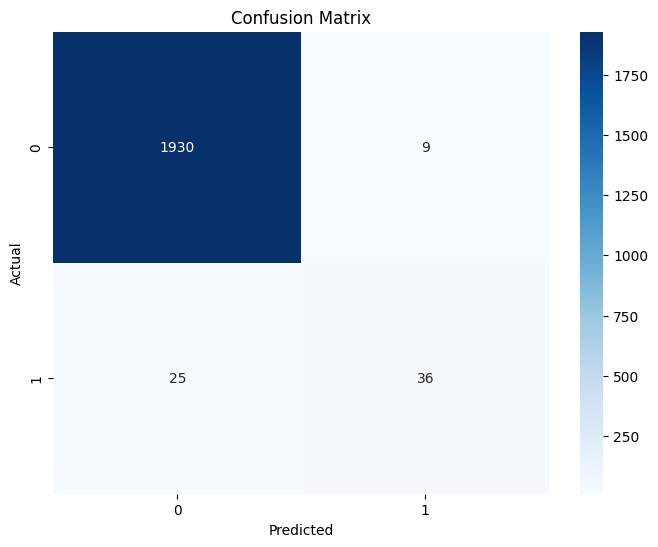

In [27]:
y_pred_rf = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.2f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Best Logistic Regression Parameters:
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.9695

Logistic Regression Test Accuracy: 0.974

Logistic Regression Confusion Matrix:
[[1934    5]
 [  47   14]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.74      0.23      0.35        61

    accuracy                           0.97      2000
   macro avg       0.86      0.61      0.67      2000
weighted avg       0.97      0.97      0.97      2000



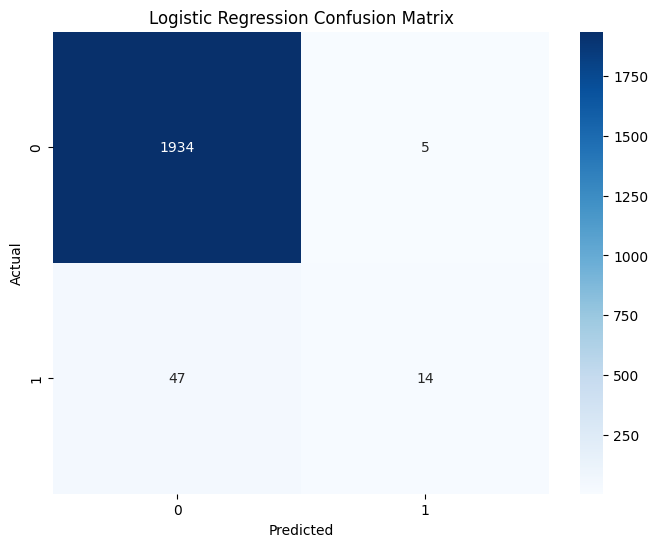

In [28]:
# Prepare the data
X = raw_data.drop(columns=['UDI', 'Product ID', 'Type', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Machine failure']).values
y = raw_data['Machine failure'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter Tuning for Logistic Regression
log_reg_params = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Optimization algorithms
}

# Create GridSearchCV for Logistic Regression
log_reg_grid = GridSearchCV(
    LogisticRegression(random_state=420, max_iter=1000), 
    log_reg_params, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1  # Use all available cores
)

# Fit GridSearchCV
log_reg_grid.fit(X_train, y_train)

# Print best parameters and score for Logistic Regression
print("Best Logistic Regression Parameters:")
print(log_reg_grid.best_params_)
print(f"Best Cross-Validation Score: {log_reg_grid.best_score_:.4f}")

# Get the best Logistic Regression model
best_log_reg = log_reg_grid.best_estimator_

# Predict and evaluate Logistic Regression
y_pred_log_reg = best_log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
print("\nLogistic Regression Test Accuracy:", log_reg_accuracy)
print("\nLogistic Regression Confusion Matrix:")
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print(cm_log_reg)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Visualize Logistic Regression Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



Best Random Forest Parameters:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.9834

Random Forest Test Accuracy: 0.9835

Random Forest Confusion Matrix:
[[1932    7]
 [  26   35]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.83      0.57      0.68        61

    accuracy                           0.98      2000
   macro avg       0.91      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000



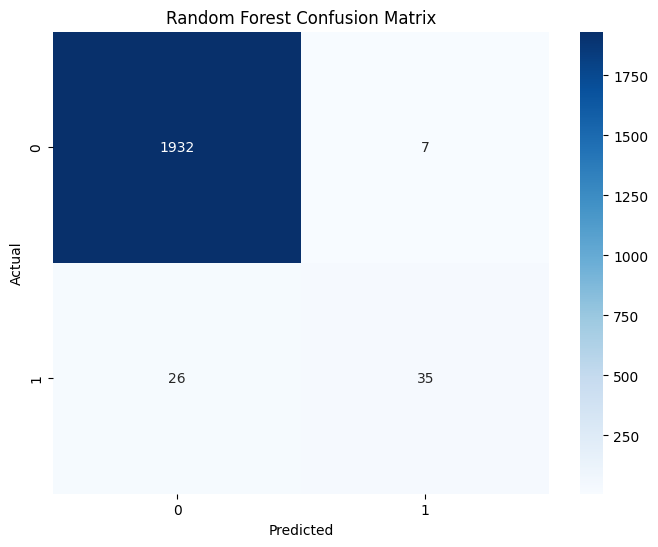

In [29]:

# Hyperparameter Tuning for Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be at a leaf node
}

# Create GridSearchCV for Random Forest
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42), 
    rf_params, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1  # Use all available cores
)

# Fit GridSearchCV
rf_grid.fit(X_train, y_train)

# Print best parameters and score for Random Forest
print("\nBest Random Forest Parameters:")
print(rf_grid.best_params_)
print(f"Best Cross-Validation Score: {rf_grid.best_score_:.4f}")

# Get the best Random Forest model
best_rf = rf_grid.best_estimator_

# Predict and evaluate Random Forest
y_pred_rf = best_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Test Accuracy:", rf_accuracy)
print("\nRandom Forest Confusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Visualize Random Forest Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


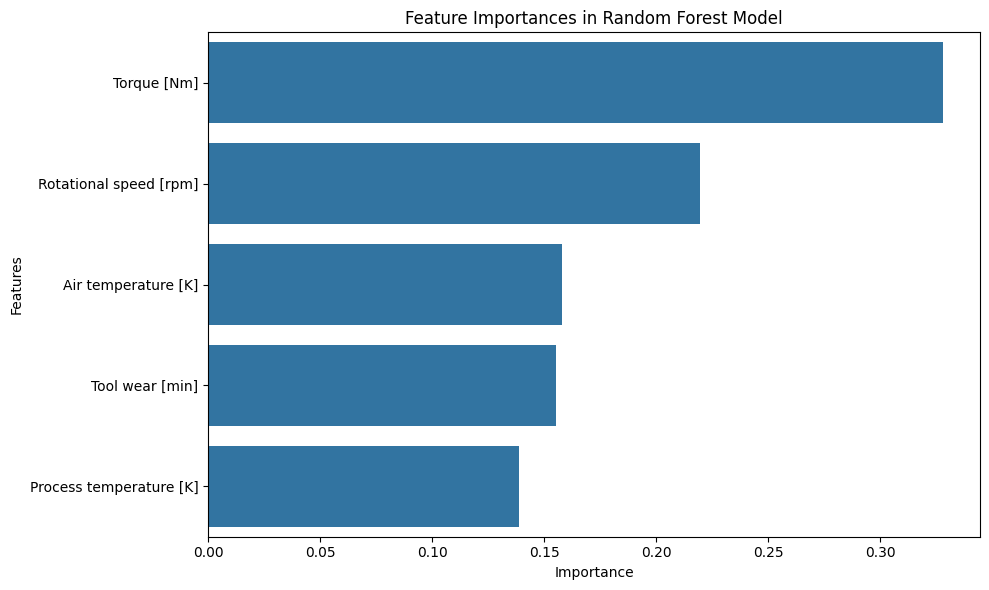


Top 5 Most Important Features:
                   feature  importance
3              Torque [Nm]    0.328148
2   Rotational speed [rpm]    0.219746
0      Air temperature [K]    0.158027
4          Tool wear [min]    0.155467
1  Process temperature [K]    0.138612


In [30]:

# Feature Importance for Random Forest (optional)
feature_names = raw_data.drop(columns=['UDI', 'Product ID', 'Type', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Machine failure']).columns
feature_importances = best_rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("\nTop 5 Most Important Features:")
print(feature_importance_df.head())


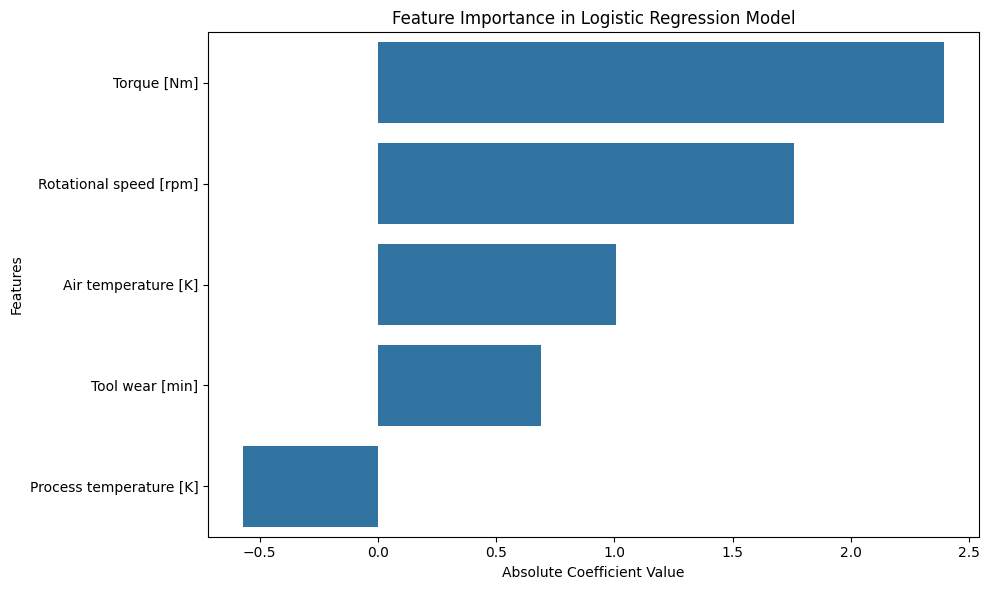


Top 5 Most Important Features in Logistic Regression:
                   feature  importance
3              Torque [Nm]    2.393430
2   Rotational speed [rpm]    1.760963
0      Air temperature [K]    1.008125
4          Tool wear [min]    0.691873
1  Process temperature [K]   -0.569965


In [31]:

# Extract the coefficients from the Logistic Regression model
log_reg_coefficients = best_log_reg.coef_.flatten()  # Flatten to 1D array
log_reg_feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': log_reg_coefficients  # Use absolute value of coefficients
}).sort_values('importance', ascending=False)




# Visualize the Logistic Regression Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=log_reg_feature_importance)
plt.title('Feature Importance in Logistic Regression Model')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Print the top 5 most important features for Logistic Regression
print("\nTop 5 Most Important Features in Logistic Regression:")
print(log_reg_feature_importance.head())


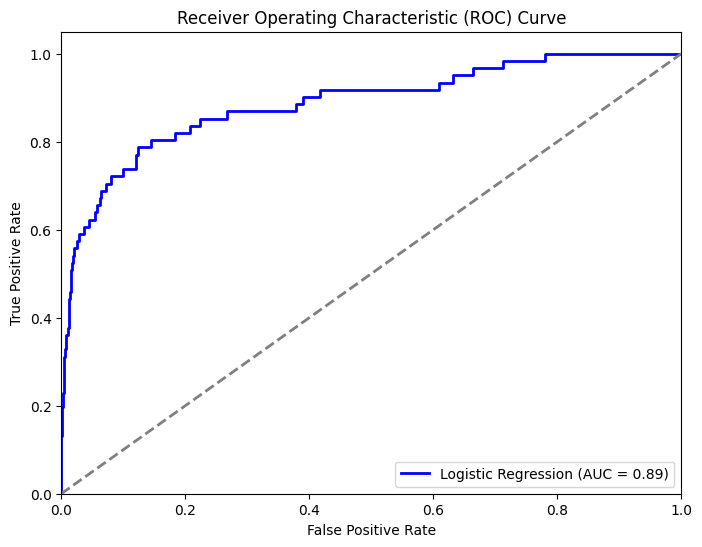

In [32]:

# ROC Curve for Logistic Regression
y_pred_prob_log_reg = best_log_reg.predict_proba(X_test)[:, 1]
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_prob_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


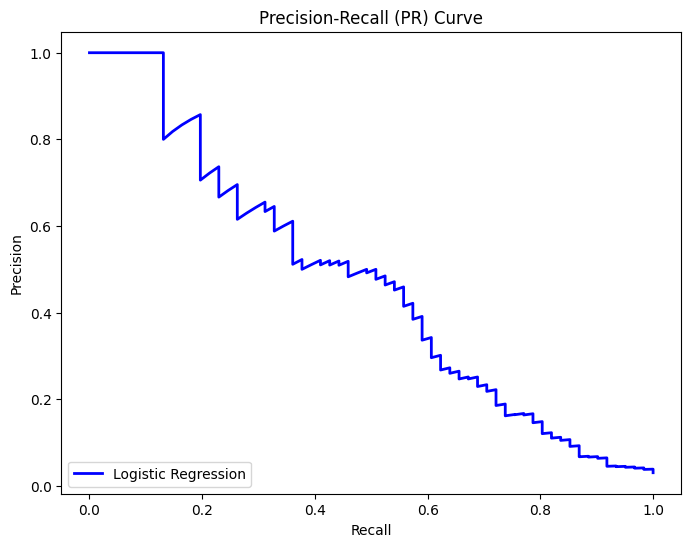

In [33]:

# Precision-Recall Curve for Logistic Regression
precision_log_reg, recall_log_reg, _ = precision_recall_curve(y_test, y_pred_prob_log_reg)

plt.figure(figsize=(8, 6))
plt.plot(recall_log_reg, precision_log_reg, color='blue', lw=2, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc='lower left')
plt.show()


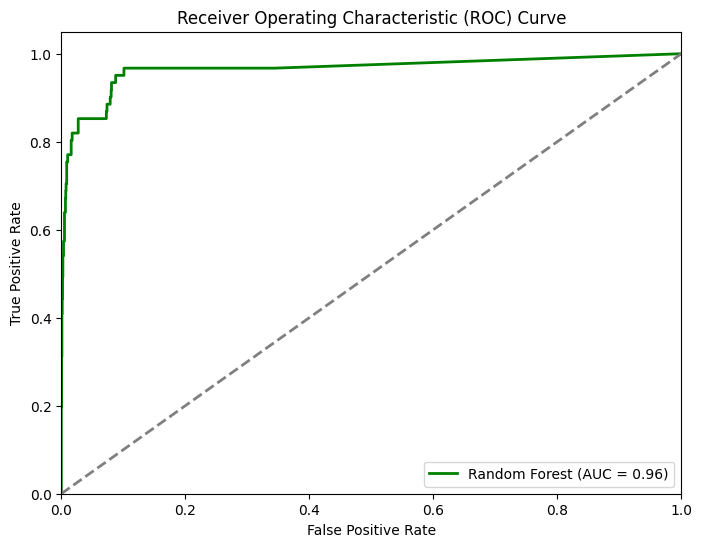

In [34]:

# ROC Curve for Random Forest
y_pred_prob_rf = best_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


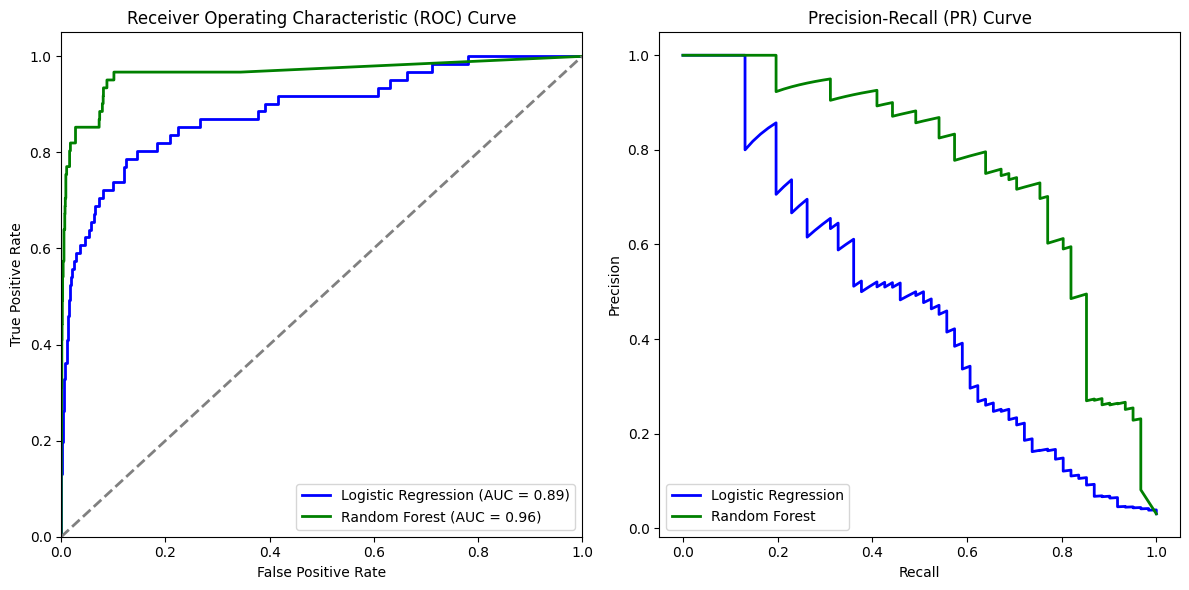

In [35]:

# Precision-Recall Curve for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_prob_rf)

plt.figure(figsize=(12, 6))

# Plot ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Plot Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall_log_reg, precision_log_reg, color='blue', lw=2, label='Logistic Regression')
plt.plot(recall_rf, precision_rf, color='green', lw=2, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()